In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd . read_excel ( 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx' )

In [4]:
df . head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Há um pouco de limpeza, precisamos fazer. Primeiro, algumas das descrições têm espaços que precisam ser removidos. Também vamos soltar as linhas que não possuem números de fatura e remover as transações de crédito (aquelas com números de fatura contendo C)

In [10]:
# limpando o dataset
df [ 'Description' ] = df [ 'Description' ] .  str .  strip ()
df .  dropna ( axis = 0 , subset = [ 'InvoiceNo' ], inplace = True )
df [ 'InvoiceNo' ] = df [ 'InvoiceNo' ] .  astype ( 'str' )
df = df [ ~ df [ 'InvoiceNo' ] .  str .  contains ( 'C' )]

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Após a limpeza, precisamos consolidar os itens em 1 transação por linha com cada produto 1 codificado a quente . Por uma questão de manter o conjunto de dados pequeno, só estou olhando as vendas para a França. No entanto, no código adicional abaixo, eu compararei esses resultados com as vendas da Alemanha. Outras comparações país seriam interessantes para investigar.

In [11]:
 basket = ( df [ df [ 'Country' ] == "France" ]
           .  groupby ([ 'InvoiceNo' , 'Description' ])[ 'Quantity' ]
           .  sum () .  unstack () .  reset_index () .  fillna ( 0 )
           .  set_index ( 'InvoiceNo' ))

In [12]:
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Há muitos zeros nos dados, mas também precisamos garantir que todos os valores positivos sejam convertidos em um 1 e qualquer coisa menos o 0 é definido como 0. Esta etapa irá completar a codificação a quente dos dados e remover a coluna de postagem (uma vez que essa carga não é uma que desejamos explora

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [16]:
basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agora que os dados estão estruturados corretamente, podemos gerar conjuntos de itens freqüentes que possuem um suporte de pelo menos 7% (este número foi escolhido para que eu possa obter exemplos úteis suficientes

In [17]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

O passo final é gerar as regras com o suporte, confiança e elevação correspondentes

As regras da associação normalmente são escritas assim: {Fraldas} -> {Cerveja}, o que significa que existe uma forte relação entre os clientes que compraram fraldas e também comprou cerveja na mesma transação.

No exemplo acima, o {Fralda} é o ANTECEDANTS e o {Cerveja} é o CONSEQUENTS . Ambos os antecedentes e consequentes podem ter vários itens. Em outras palavras, {Fralda, Goma} -> {Cerveja, Chips} é uma regra válida. 

O SUPPORT é a frequência relativa que as regras aparecem. Em muitos casos, você pode querer procurar suporte alto para se certificar de que é um relacionamento útil. No entanto, pode haver casos em que um suporte baixo seja útil se você estiver tentando encontrar relacionamentos "ocultos".

CONFIDENCE é uma medida da confiabilidade da regra. Uma confiança de .5 no exemplo acima significaria que, em 50% dos casos em que os fraldas e Gum foram comprados, a compra também incluiu Cerveja e Chips. Para a recomendação do produto, uma confiança de 50% pode ser perfeitamente aceitável, mas em uma situação médica, este nível pode não ser suficientemente elevado.

LIFT é a proporção do suporte observado para o esperado se as duas regras fossem independentes (veja wikipedia ). A regra básica é que um valor de elevação perto de 1 significa que as regras eram completamente independentes. Os valores de elevação> 1 geralmente são mais "interessantes" e podem ser indicativos de um padrão de regra útil. 

In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.763158,7.478947
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.725000,7.478947
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.815789,8.642959
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.837838,8.642959
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.725000,7.681081


Isso é tudo! Crie os itens freqüentes usando apriori então crie as regras com association_rules .

Agora, a parte complicada é descobrir o que isso nos diz. Por exemplo, podemos ver que existem algumas regras com um elevado valor de elevação, o que significa que ocorre com mais freqüência do que seria esperado dado o número de transações e combinações de produtos. Nós também podemos ver vários casos em que a confiança também é alta. Esta parte da análise é onde o conhecimento do domínio será útil. Como não tenho isso, vou procurar alguns exemplos ilustrativos. 

Podemos filtrar o quadro de dados usando o código de pandas padrão. Neste caso, procure um elevador grande (6) e alta confiança (.8)

In [20]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedants,consequents,support,confidence,lift
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.815789,8.642959
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.837838,8.642959
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.800000,6.030769
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.960000,6.968889
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.888889,6.968889
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.975000,7.077778
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.975000,7.644000
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.812500,6.125000


Ao olhar para as regras, parece que os relógios de alarme verde e vermelho são comprados juntos e os copos, guardanapos e pratos de papel vermelho são comprados juntos de uma maneira que é maior do que a probabilidade geral sugeriria.

Neste ponto, você pode querer ver a quantidade de oportunidade que existe para usar a popularidade de um produto para impulsionar as vendas de outro. Por exemplo, podemos ver que vendemos 340 relógios de alarme verde, mas apenas 316 despertadores vermelhos, então talvez possamos gerar mais vendas de Despertador Vermelho através de recomendações? 

In [21]:
basket['ALARM CLOCK BAKELIKE GREEN'].sum()

340.0

In [22]:
basket['ALARM CLOCK BAKELIKE RED'].sum()

316.0

O que também é interessante é ver como as combinações variam de acordo com o país de compra. Vamos verificar o que algumas combinações populares podem ser na Alemanha:

In [26]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [27]:
basket2

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
basket_sets2 = basket2.applymap(encode_units)

In [29]:
basket_sets2

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
basket_sets2.drop('POSTAGE', inplace=True, axis=1)

In [31]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)

In [32]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

In [33]:
rules2[ (rules2['lift'] >= 4) & (rules2['confidence'] >= 0.5)]

,antecedants,consequents,support,confidence,lift
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.584906,4.242887
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.571429,4.145125
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.843750,6.648168


Parece que, além de David Hasselhoff, os alemães adoram os rebocos em Tin Spaceboy e Woodland Animals.

Com toda a seriedade, um analista que tenha familiaridade com os dados provavelmente teria uma dúzia de perguntas diferentes que esse tipo de análise poderia gerar. Eu não reproduzi essa análise para outros países ou combos de clientes, mas o processo global seria relativamente simples, dado o código básico de pandas mostrado acima. 

O aspecto realmente agradável da análise de associação é que é fácil de executar e relativamente fácil de interpretar. Se você não tivesse acesso a MLxtend e a essa análise de associação, seria extremamente difícil encontrar esses padrões usando a análise básica do Excel. Com o python e o MLxtend, o processo de análise é relativamente direto e, como você está em python, você tem acesso a todas as técnicas de visualização e ferramentas de análise de dados adicionais no ecossistema python.

Finalmente, eu encorajo você a verificar o resto da biblioteca MLxtend. Se você está fazendo algum trabalho no sci-kit, é útil familiarizar-se com o MLxtend e como pode aumentar algumas das ferramentas existentes no seu toolkit de ciência dos dados. 

funcao market_basket
country = pais de origem
min_support = apriori definido em 0.0 a escala 1 ex: 0.7 -> 7% 
lift = 0 a escala 1, ( Os valores de elevação> 1 geralmente são mais "interessantes" e podem ser indicativos de um padrão de regra útil)
confidence = 0 a escala 1

In [45]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2[ (rules2['lift'] >= 4) & (rules2['confidence'] >= 0.5)]

,antecedants,consequents,support,confidence,lift
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.584906,4.242887
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.571429,4.145125
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.843750,6.648168


In [46]:
basket2['PLASTERS IN TIN CIRCUS PARADE'].sum()

774.0

In [47]:
basket2['PLASTERS IN TIN WOODLAND ANIMALS'].sum()

857.0

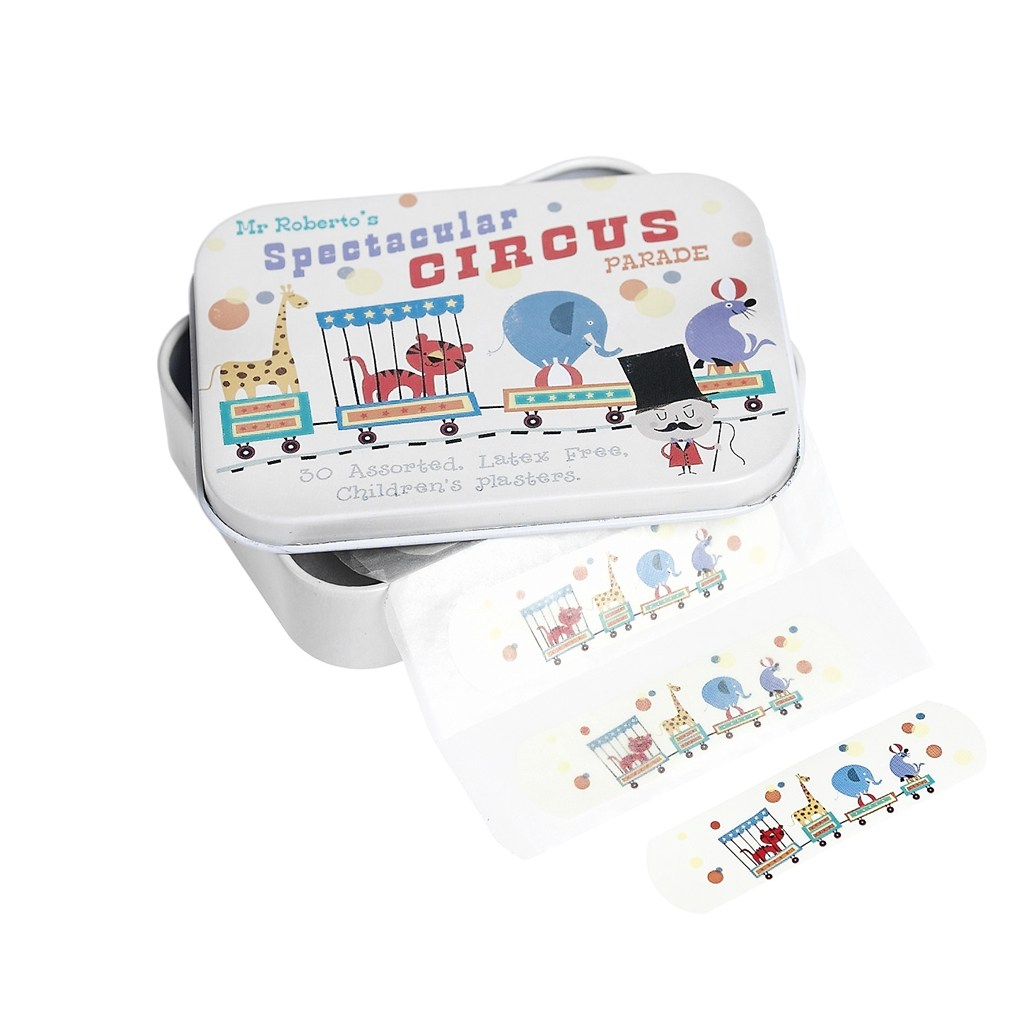

In [49]:
from IPython.display import Image
Image("ptc.jpg")

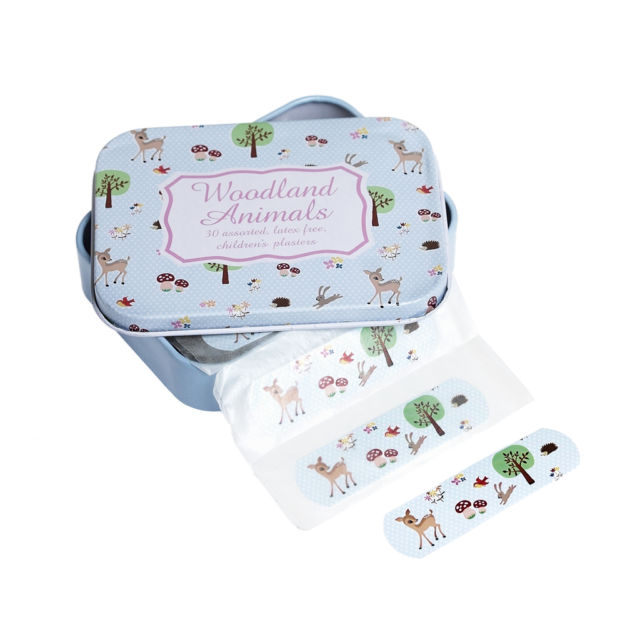

In [51]:
from IPython.display import Image
Image("pwa.jpg")